# 🗺 Spatial Hydrology and Interpolation

Welcome to the **Spatial Hydrology and Interpolation** notebook. This notebook introduces key spatial statistics and geospatial methods to estimate and map hydrological variables like rainfall or groundwater levels.

---

## 🎯 Learning Objectives
- Understand spatial variability and spatial autocorrelation
- Perform spatial interpolation using Inverse Distance Weighting (IDW)
- Visualize spatial patterns using maps
- Construct basic semivariograms
- Practice spatial prediction with Python


## 📂 Step 1: Create Synthetic Rainfall Station Data
Simulate rainfall at different geographic coordinates to replicate spatial station observations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

np.random.seed(42)
n = 20
x = np.random.uniform(0, 100, n)
y = np.random.uniform(0, 100, n)
rainfall = np.random.normal(100, 15, n)

df = pd.DataFrame({'X': x, 'Y': y, 'Rainfall': rainfall})
df['geometry'] = [Point(xy) for xy in zip(df.X, df.Y)]
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.crs = 'EPSG:4326'
gdf.head()

C:\Users\Zuhail\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,X,Y,Rainfall,geometry
0,37.454012,61.185289,99.797542,POINT (37.45401 61.18529)
1,95.071431,13.949386,84.134336,POINT (95.07143 13.94939)
2,73.199394,29.214465,112.338174,POINT (73.19939 29.21446)
3,59.865848,36.636184,81.687345,POINT (59.86585 36.63618)
4,15.601864,45.606998,103.132954,POINT (15.60186 45.607)


## 🗺 Step 2: Visualize Rainfall Stations on Map

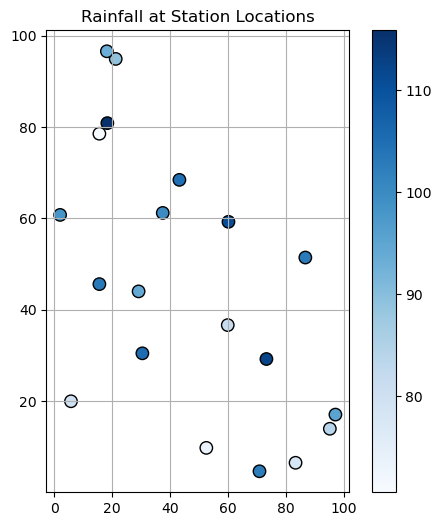

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(ax=ax, column='Rainfall', cmap='Blues', legend=True, markersize=80, edgecolor='black')
plt.title("Rainfall at Station Locations")
plt.grid(True)
plt.show()

## 🛠 Step 3: Inverse Distance Weighting (IDW) Interpolation
We’ll estimate rainfall values on a continuous surface using the IDW technique.

In [3]:
from scipy.spatial import cKDTree

# Interpolation grid
grid_x, grid_y = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 100, 100))
grid_points = np.vstack((grid_x.ravel(), grid_y.ravel())).T

# IDW interpolation
tree = cKDTree(np.column_stack([x, y]))
dists, idxs = tree.query(grid_points, k=4)
weights = 1 / (dists + 1e-12)
weights /= weights.sum(axis=1, keepdims=True)
interp_vals = np.sum(weights * rainfall[idxs], axis=1)
interp_grid = interp_vals.reshape(100, 100)

## 🖼 Step 4: Plot Interpolated Rainfall Map

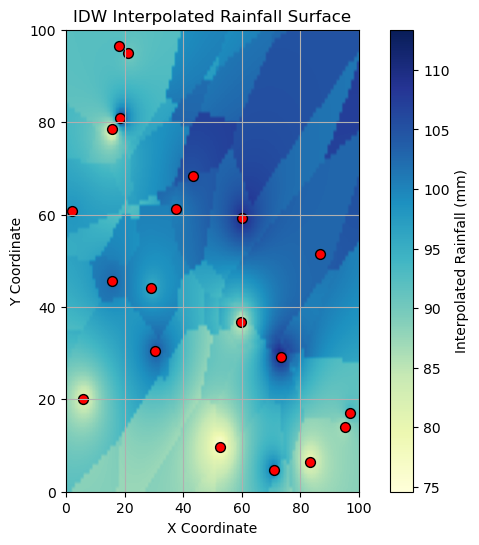

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.imshow(interp_grid, extent=(0, 100, 0, 100), origin='lower', cmap='YlGnBu')
gdf.plot(ax=ax, color='red', edgecolor='black', markersize=50)
plt.colorbar(c, ax=ax, label='Interpolated Rainfall (mm)')
plt.title("IDW Interpolated Rainfall Surface")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

## 📈 Step 5: Estimate Empirical Semivariogram
Use distance and squared difference to compute semivariance between all point pairs.

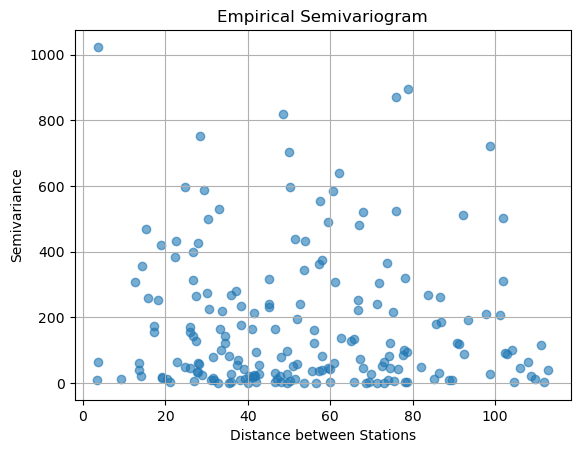

In [5]:
from scipy.spatial.distance import pdist

coords = np.column_stack([x, y])
distances = pdist(coords)
semivariance = pdist(rainfall.reshape(-1, 1))**2 / 2

plt.scatter(distances, semivariance, alpha=0.6)
plt.xlabel("Distance between Stations")
plt.ylabel("Semivariance")
plt.title("Empirical Semivariogram")
plt.grid(True)
plt.show()

## 🧠 Step 6: Practice Exercises
1. Use a real rainfall or groundwater shapefile dataset and apply IDW.
2. Implement Kriging using `pykrige.ok.OrdinaryKriging`.
3. Modify the IDW weight power to compare sharper vs smoother surfaces.
4. Create a contour map using `matplotlib.contourf` from the interpolated grid.
5. Try Leave-One-Out Cross Validation to assess prediction errors.

---

You've now practiced spatial interpolation and learned the basics of spatial statistics in hydrology!